# Homework 4
## MBP 1201 - Introductory Biostatistics

## Submission format

This assignment should be submitted online on Quercus by Oct 17, 11:59 pm EDT. Your submission should include a single file:

1. FIRSTNAME_LASTNAME_STUDENTNUMBER.ipynb containing all of the Python code, plots, and plain-text responses you’ve used to answer the questions.

## Exercise 1 - Regularized Regression (3 Marks)

### Preamble
Suppose that instead of a single independent variable $x$ and dependent variable $y$, we now have $N$ independent variables $x_1, \ldots, x_N$ and $N$ dependent variables $y_1, \ldots, y_N$. The general constrained regression problem now becomes

*Find values $M_1, \ldots, M_N$ that minimize $\sum_{i=1}^N (y_i - M_ix_i)^2$ subject to a regularization penalty $R(M)$.*

### Question

Match the regression techniques below with their corresponding regularization penalty. 

A. Lasso Regression 

B. Ridge Regression

C. Linear Regression

$\,$

I. No regularization penalty.

II\. $L^1$ regularization: penalize high values of $R(M) = \|M\|_1 = \sum_{i=1}^N |M_i|$. 

III\. $L^2$ regularization: penalize high values of $R(M) = \|M\|_2^2 = \sum_{i=1}^N M_i^2$. 

### Bonus (Optional 1 Mark)

Show that the optimal solution for the regression problem
$$\arg\min_{x}\{\|Ax - b\|_2^2 + \lambda \|x\|_2^2\} = (A^TA + \lambda I)^{-1}A^Tb,$$
where $x, b\in \mathbb{R}^2$ are vectors, $\lambda \in \mathbb{R}$ is a scalar, $A \in M_2(\mathbb{R})$ is a $2 \times 2$ real-valued matrix, $A^T$ denotes the transpose of $A$, and $I$ is the $2\times 2$ identity matrix. 


- Part 1\
Lasso Regression -> $L^1$ regularization: penalize high values of $R(M) = \|M\|_1 = \sum_{i=1}^N |M_i|$\
Ridge Regression -> $L^2$ regularization: penalize high values of $R(M) = \|M\|_2^2 = \sum_{i=1}^N M_i^2$\
Linear Regression -> No regularization penalty

- Bonus\
let J be the cost function where 
$$
J = \arg\min_{x}\{\|Ax - b\|_2^2 + \lambda \|x\|_2^2\}
$$
In order to minimize the cost function, we need to do derivative of the cost function with respect to $x$.
$$
{dJ \over dx} = 2A^T(Ax - b) + 2\lambda x
$$
Do get the optimal solution of the cost function, we set the derivative to 0 and get the following answer:
$$
{dJ \over dx} = 2A^T(Ax - b) + 2\lambda x = 0\\
2A^TAx + 2\lambda x = 2A^Tb\\
2(A^TA+\lambda I)x = 2A^Tb\\
x = (A^TA+\lambda I)^{-1}A^Tb
$$
Therefore, $$\arg\min_{x}\{\|Ax - b\|_2^2 + \lambda \|x\|_2^2\} = (A^TA + \lambda I)^{-1}A^Tb$$

## Exercise 2 - Visualizing $L^p$ norms (3 marks)

Generalizing the regularizations defined above, we can define $\|M\|_p := \left(\sum_{i=1}^N |M_i|^p\right)^{1/p}$ for any $p>0$. 

Overplot the segments $A_p = \{\vec r = (x, y) \in \mathbb{R}^2: x\geq 0, y\geq 0, \|r\|_p = 1\}$ for $p = [0.5, 1, 2, 4, 10^6]$. By visually inspecting the curves, what do you think the area under the curve $A_p$ (in the region $0\leq x \leq 1$, $0 \leq y \leq 1$) approach as $p \to 0$? $p\to\infty$?

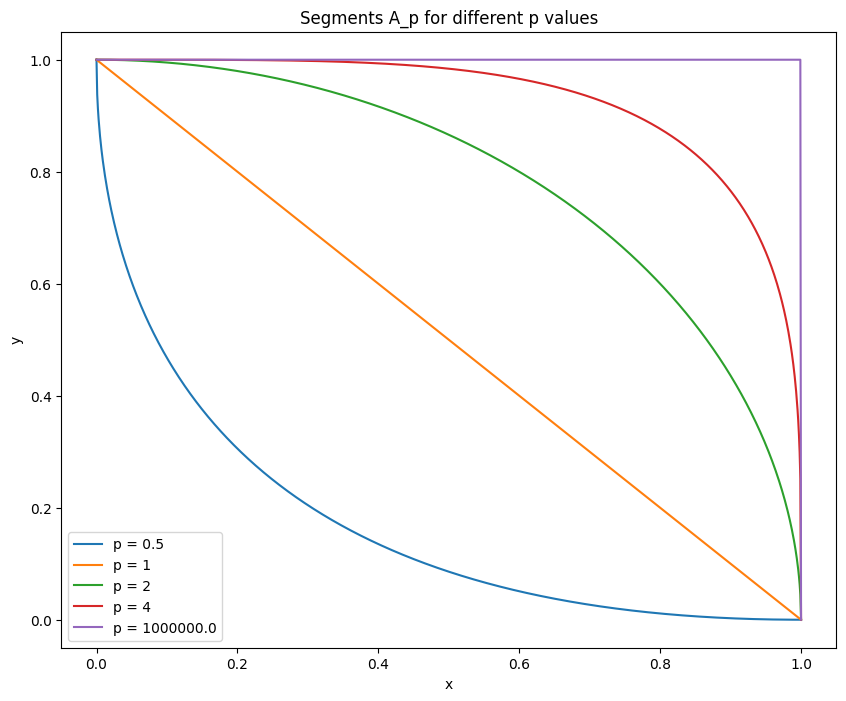

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Values and colors of p
p_values = [0.5, 1, 2, 4, 1e6]
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Generate points for each curve
num_points = 1000
x = np.linspace(0, 1, num_points)

# Plot the segments A_p for each p
fig = plt.figure(figsize=(10, 8))
hs = []
names = []
for i, p in enumerate(p_values):
    y = (1 - np.abs(x)**p) ** (1/p)
    plt.plot(x, y)

# make the plot perfect
plt.xlabel('x')
plt.ylabel('y')
plt.title('Segments A_p for different p values')
plt.legend(['p = {}'.format(p) for p in p_values])
plt.show()

From the plot, within the range [0, 1] for both $x$ and $y$, we can conclude that when
$$
p \to 0, AUC \to 0\\ p \to \infty, AUC \to 1
$$

## Exercise 3 - Categorical and Continuous Variables (4 marks)

In a short paragraph (no more than 3-4 sentences), explain your answers to the following questions.

* Explain the difference between categorical and continuous variables. 
* Can you use linear regression for independent categorical variables? Dependent categorical variables?
* Can you use random forest classification for independent continuous variables? Dependent continuous variables? 


- Part 1
    - categorical variables stand for the discrete values or groups, while the continuous variables represent the any values within a defined range.
    - categorical variables has no order by default, while the continuous variables are naturally ordered.
    - categorical and continuous variables are usually manipulated and evaluated by different methods.
- Part 2\
I do not think we can use linear regression for dependent categorical variables but can use for independent variables. According to the definition of linear regression, it can fit both independent continuous and categorical variables (need to be processed firstly) to inference dependent continuous variables but not for dependent categorical variable.

- Part 3\
We can use random forest classification for independent but not dependent continuous variables. According to the definition of random forest classification, it is a decision tree used to predict classes or groups (categorical variable) but not for the dependent continuous variable this case. It can utilize the independent continuous variables to predict the dependent categorical variable.

## Exercise 4. Classification (10 marks)
We are going to consider a published dataset of breast cancer tumours for classification. This data is also available from the `scikit-learn` Python package. Sample code has been provided below to load in this dataset into python and rescale the data by column.

The goal of this problem is to predict whether or not each row of the dataset is in fact a tumour, given various features derived from an image of the potential lesion.

1. Split the data into two parts, a training set (80%) and a test set (20%) using the `sklearn.model_selection.train_test_split()` 

1. Use the `sklearn.linear_model.LogisticRegressionCV()` function to
build a logistic regression classifier (with built-in cross validation) on the
training set. This will classify malignant (1) vs. benign (0) tumors based
on the scaled features. Use a 5-fold cross validation with the parameter
`cv=5`.

1. Build a random forest classifier from the training data using the `sklearn.ensemble.RandomForestClassifier()` function.

1. Use the test data to calculate and plot ROC curves using the `sklearn.metrics.plot_roc_curve()` function for both logistic regression and random forest classification. What are the AUC values for each model?


AUC score of logistic regression: 0.9946014607812004
AUC score of random forest classification: 0.9965068275643061


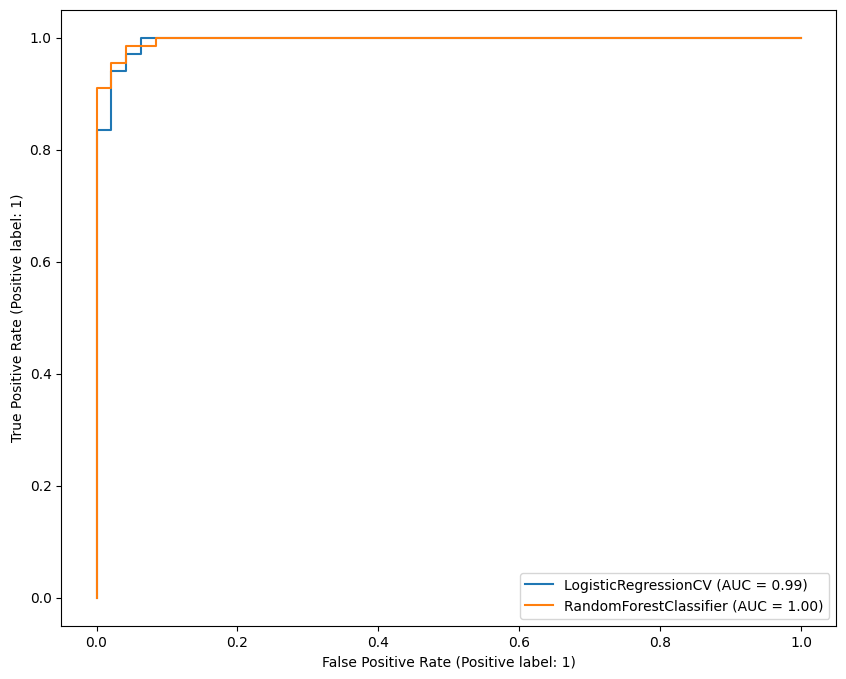

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

data_cancer = load_breast_cancer()

df_cancer = pd.DataFrame(
data=data_cancer.data,
columns=data_cancer.feature_names, )
tumor_status = data_cancer.target

for k in df_cancer.keys():
    df_cancer[k] = scale(df_cancer[k])

train_x, test_x, train_y, test_y = train_test_split(df_cancer, tumor_status, test_size=0.2, random_state=0)
clf = LogisticRegressionCV(cv=5, max_iter=800).fit(train_x, train_y)

rfclf = RandomForestClassifier(random_state=0).fit(train_x, train_y)
fig, ax = plt.subplots(figsize=(10, 8))
RocCurveDisplay.from_estimator(clf, test_x, test_y, ax=ax)
RocCurveDisplay.from_estimator(rfclf, test_x, test_y, ax=ax)

print(f'AUC score of logistic regression: {roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])}\nAUC score of random forest classification: {roc_auc_score(test_y, rfclf.predict_proba(test_x)[:,1])}')